In [1]:
import zipfile
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from torch.utils.data import Dataset

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Cargar datos**

In [3]:
# Definir la transformación para redimensionar las imágenes
resize_transform = transforms.Resize((256, 256))

In [4]:
# Lista para almacenar las imágenes y las etiquetas
ima = []
etiquetas = []

ruta_data = '/content/drive/MyDrive/Inteligencia_Artificial/DATASET/DATASET/TRAIN'
# Recorre todas las subcarpetas (clases) en el directorio raíz
'''for nombre_clase in os.listdir(ruta_data):
    carpeta_clase = os.path.join(ruta_data, nombre_clase)

    # Verifica si es una carpeta
    if os.path.isdir(carpeta_clase):
        # Lee las imágenes en la carpeta y asocia las etiquetas
        for nom in os.listdir(carpeta_clase):
            ruta_image = os.path.join(carpeta_clase, nom )
            image = Image.open(ruta_image)

            # Añade la imagen a la lista de imágenes
            ima.append(image)

            # Añade la etiqueta correspondiente a la lista de etiquetas
            etiquetas.append(nombre_clase)'''

'for nombre_clase in os.listdir(ruta_data):\n    carpeta_clase = os.path.join(ruta_data, nombre_clase)\n\n    # Verifica si es una carpeta\n    if os.path.isdir(carpeta_clase):\n        # Lee las imágenes en la carpeta y asocia las etiquetas\n        for nom in os.listdir(carpeta_clase):\n            ruta_image = os.path.join(carpeta_clase, nom )\n            image = Image.open(ruta_image)\n\n            # Añade la imagen a la lista de imágenes\n            ima.append(image)\n\n            # Añade la etiqueta correspondiente a la lista de etiquetas\n            etiquetas.append(nombre_clase)'

In [5]:
# Recorre todas las subcarpetas (clases) en el directorio raíz
for nombre_clase in os.listdir(ruta_data):
    carpeta_clase = os.path.join(ruta_data, nombre_clase)

    # Verifica si es una carpeta
    if os.path.isdir(carpeta_clase):
        # Lee las imágenes en la carpeta y asocia las etiquetas
        for nom in os.listdir(carpeta_clase):
            ruta_image = os.path.join(carpeta_clase, nom)
            image = Image.open(ruta_image).convert("RGB")


            # Aplica la transformación de redimensionar a (256, 256)
            image_resized = resize_transform(image)

            # Añade la imagen redimensionada a la lista de imágenes
            ima.append(image_resized)

            # Añade la etiqueta correspondiente a la lista de etiquetas
            etiquetas.append(nombre_clase)

In [6]:
print("Cantidad de elementos de la data:",len(ima))

Cantidad de elementos de la data: 22564


###**Presentar ejemplo de imagenes al azar**

In [7]:
def visualizar_imagenes_en_matriz(data_ima, data_label, num_filas, num_columnas):
    # Visualizar imágenes de la lista 'data_ima'
    random_indices = np.random.choice(len(data_ima), num_filas*num_columnas, replace=False)
    data_ima = [data_ima[i] for i in random_indices]
    data_etiquetas = [data_label[i] for i in random_indices]

    # Visualizar la matriz de imágenes segun las filas y columnas esperadas
    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data_ima[i])
        ax.set_title("Etiqueta:" + str(data_etiquetas[i]))
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [8]:
# Suponiendo que `imagenes` es tu conjunto de imágenes antes de pasarlas al modelo

for i, img in enumerate(ima):
    print(f"Imagen {i + 1} - Forma: {img.size}")

Se han truncado las últimas 5000 líneas del flujo de salida.
Imagen 17565 - Forma: (256, 256)
Imagen 17566 - Forma: (256, 256)
Imagen 17567 - Forma: (256, 256)
Imagen 17568 - Forma: (256, 256)
Imagen 17569 - Forma: (256, 256)
Imagen 17570 - Forma: (256, 256)
Imagen 17571 - Forma: (256, 256)
Imagen 17572 - Forma: (256, 256)
Imagen 17573 - Forma: (256, 256)
Imagen 17574 - Forma: (256, 256)
Imagen 17575 - Forma: (256, 256)
Imagen 17576 - Forma: (256, 256)
Imagen 17577 - Forma: (256, 256)
Imagen 17578 - Forma: (256, 256)
Imagen 17579 - Forma: (256, 256)
Imagen 17580 - Forma: (256, 256)
Imagen 17581 - Forma: (256, 256)
Imagen 17582 - Forma: (256, 256)
Imagen 17583 - Forma: (256, 256)
Imagen 17584 - Forma: (256, 256)
Imagen 17585 - Forma: (256, 256)
Imagen 17586 - Forma: (256, 256)
Imagen 17587 - Forma: (256, 256)
Imagen 17588 - Forma: (256, 256)
Imagen 17589 - Forma: (256, 256)
Imagen 17590 - Forma: (256, 256)
Imagen 17591 - Forma: (256, 256)
Imagen 17592 - Forma: (256, 256)
Imagen 17593 - 

In [9]:
print(ima[0])

<PIL.Image.Image image mode=RGB size=256x256 at 0x7F73089347C0>


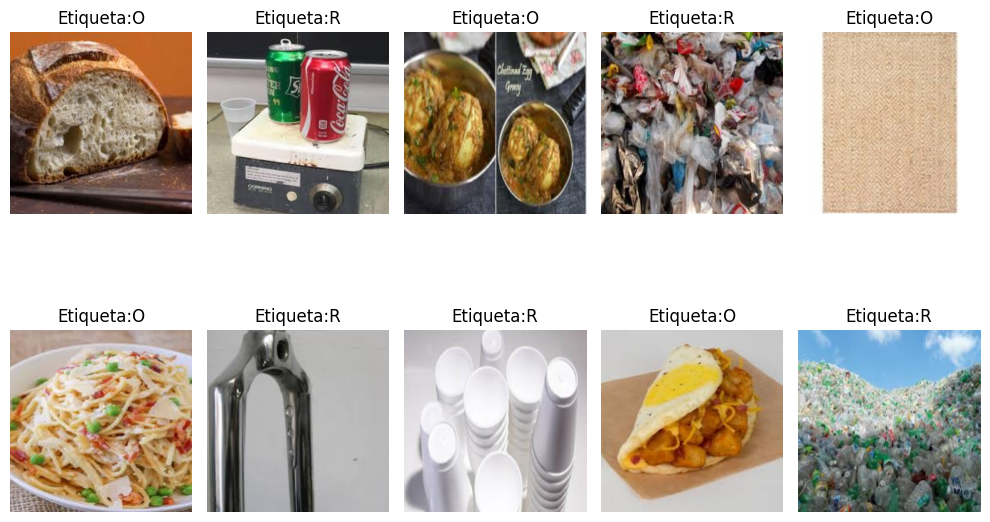

In [10]:
num_filas = 2
num_columnas = 5
visualizar_imagenes_en_matriz(ima, etiquetas, num_filas=num_filas, num_columnas=num_columnas)

#**PreProcesamiento de los datos**

In [11]:
#Sustitución los nombres por números en los labels
mapeo = {"R": 0,  "O": 1}
labels = []
for valor in etiquetas:
    labels.append(mapeo[valor])

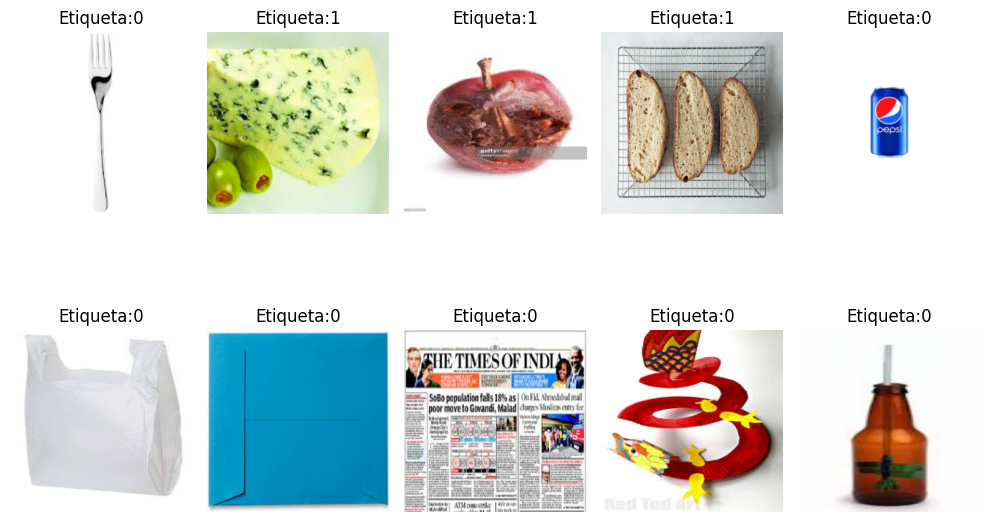

In [12]:
#Visualizar data modificada
visualizar_imagenes_en_matriz(ima, labels, 2, 5)

In [13]:
# División de los datos en conjuntos de entrenamiento y prueba
labels = [int(label) for label in labels] # convertir las etiquetas a enteros
train_data, test_data, train_labels, test_labels = train_test_split(ima, labels, test_size=0.2, random_state=42)

In [14]:
# Información sobre la data
print(f'Cantidad de datos de entrenamiento: {len(train_data)}')
print(f'Cantidad de datos de prueba: {len(test_data)}')
print(f'Etiquetas que van desde 0 a 2')

Cantidad de datos de entrenamiento: 18051
Cantidad de datos de prueba: 4513
Etiquetas que van desde 0 a 2


In [15]:
# Clase para personalizar el dataset
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]

        if self.transform is not None:
            image = self.transform(image)

        return image, label

In [16]:
transform = transforms.Compose([
    transforms.Resize((256, 256)), #Redimensionar las imagenes
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])

In [17]:
# Crear una instancia de CustomDataset
train_dataset = CustomDataset(train_data, train_labels, transform=transform)
test_dataset = CustomDataset(test_data, test_labels, transform=transform)

# Crear instancias de DataLoader para el conjunto de entrenamiento y prueba
batch_size = 64 # Tamaño del lote
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [18]:
train_dataset[5]

(tensor([[[-0.0667, -0.0588, -0.0431,  ...,  0.1373,  0.0275, -0.1137],
          [-0.0745, -0.0667, -0.0510,  ...,  0.1608,  0.0431, -0.0980],
          [-0.0902, -0.0902, -0.0745,  ...,  0.2078,  0.0824, -0.0745],
          ...,
          [ 0.3176,  0.3333,  0.3490,  ..., -0.5137, -0.5137, -0.5216],
          [ 0.3255,  0.3412,  0.3569,  ..., -0.5451, -0.5451, -0.5529],
          [ 0.3333,  0.3412,  0.3569,  ..., -0.5608, -0.5686, -0.5686]],
 
         [[-0.0824, -0.0745, -0.0588,  ...,  0.2941,  0.1608,  0.0118],
          [-0.0902, -0.0824, -0.0667,  ...,  0.3176,  0.1843,  0.0275],
          [-0.1059, -0.1059, -0.0902,  ...,  0.3647,  0.2235,  0.0510],
          ...,
          [ 0.1059,  0.1216,  0.1373,  ..., -0.7020, -0.7020, -0.7098],
          [ 0.1137,  0.1294,  0.1451,  ..., -0.7176, -0.7255, -0.7255],
          [ 0.1216,  0.1294,  0.1451,  ..., -0.7255, -0.7333, -0.7333]],
 
         [[-0.2000, -0.1922, -0.1765,  ..., -0.0902, -0.1608, -0.2784],
          [-0.2078, -0.2000,

##**Diseño de la arquitectura**

In [19]:
class ModeloConv(nn.Module):
    def __init__(self):
        super(ModeloConv, self).__init__()

        # Capa convolucional 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Capa convolucional 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Capa convolucional 3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU(inplace=True)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected 1
        self.avgpool = nn.AdaptiveAvgPool2d((4, 4))
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.bn4 = nn.BatchNorm1d(256)
        self.relu4 = nn.ReLU(inplace=True)
        self.dropout1 = nn.Dropout(p=0.5)

        # Fully connected 2
        self.fc2 = nn.Linear(256, 128)
        self.bn5 = nn.BatchNorm1d(128)
        self.relu5 = nn.ReLU(inplace=True)
        self.dropout2 = nn.Dropout(p=0.5)

        # Fully connected 3
        self.fc3 = nn.Linear(128, 3)

    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = self.pool3(self.relu3(self.bn3(self.conv3(x))))
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout1(self.relu4(self.bn4(self.fc1(x))))
        x = self.dropout2(self.relu5(self.bn5(self.fc2(x))))
        x = self.fc3(x)
        return x

In [20]:
modelo = ModeloConv()

In [21]:
# Mover el modelo a la GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Mover el modelo a la GPU (si está disponible)
modelo.to(device)

ModeloConv(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU(inplace=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (avgpool): AdaptiveAvgPool2d(output_size=(4, 4))
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (bn4): BatchNorm1d(256, e

In [22]:
def entrenar_validad(model, num_epochs, lr):
  # Definir listas para almacenar resultados
  train_losses = []
  test_losses = []
  accuracies = []
  f1_scores = []
  y_predecidas = []

  # Definir la función de pérdida y el optimizador
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=lr)

  #Entrenamiento
  for epoch in range(num_epochs):
      model.train() #Modelo en modo de entrenamiento
      train_loss = 0.0

      # Ciclo de entrenamiento para cada lote de datos
      for batch_idx, (inputs, labels) in enumerate(train_dataloader):
          # Mover los datos al dispositivo (GPU si está disponible)
          inputs = inputs.to(device)
          labels = labels.to(device)

          optimizer.zero_grad() # Reiniciar los gradientes
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Calcular la pérdida total
          train_loss += loss.item() * inputs.size(0)

      # Calcular la pérdida promedio
      train_loss /= len(train_dataloader.dataset)
      train_losses.append(train_loss)

      #Validacion
      model.eval() # Evaluar el modelo en el conjunto de prueba después de cada época
      test_loss = 0.0
      correct = 0
      total = 0
      y_true = []
      y_pred = []

      with torch.no_grad():
          for inputs, labels in test_dataloader:
              # Mover los datos al dispositivo (GPU si está disponible)
              inputs = inputs.to(device)
              labels = labels.to(device)

              # Pasar hacia adelante
              outputs = model(inputs)
              loss = criterion(outputs, labels)

              # Calcular la pérdida total
              test_loss += loss.item() * inputs.size(0)

              # Calcular el número total de muestras y la precisión en el conjunto de prueba
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

              # Calcular el F1 score
              y_true.extend(labels.cpu().numpy())
              y_pred.extend(predicted.cpu().numpy())

      accuracy = correct / total # Almacena la precisión
      accuracies.append(accuracy)
      test_loss /= len(test_dataloader.dataset) # Perdida en el la validacion
      test_losses.append(test_loss)
      f1 = f1_score(y_true, y_pred, average='macro')
      f1_scores.append(f1)

      # Imprimir la precisión en el conjunto de entrenamiento y prueba
      if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Valid Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

  return  train_losses, test_losses, accuracies, y_predecidas, y_true, y_pred


In [23]:
#entrenamiento con imagenes de entrada con un tamaño de 256 * 256 y batch_size 64
train_losses, test_losses, accuracies, y_predecidas, y_true, y_pred = entrenar_validad(modelo, 100, lr=0.0001)

Epoch [10/100], Loss: 0.2876, Valid Loss: 0.2906, Accuracy: 0.8848, F1 Score: 0.8832
Epoch [20/100], Loss: 0.2441, Valid Loss: 0.2791, Accuracy: 0.8872, F1 Score: 0.8853
Epoch [30/100], Loss: 0.1993, Valid Loss: 0.2996, Accuracy: 0.8784, F1 Score: 0.8778
Epoch [40/100], Loss: 0.1556, Valid Loss: 0.3009, Accuracy: 0.8987, F1 Score: 0.8962
Epoch [50/100], Loss: 0.1299, Valid Loss: 0.4637, Accuracy: 0.8405, F1 Score: 0.8405
Epoch [60/100], Loss: 0.1171, Valid Loss: 0.3044, Accuracy: 0.8985, F1 Score: 0.8970
Epoch [70/100], Loss: 0.1053, Valid Loss: 0.3178, Accuracy: 0.8994, F1 Score: 0.8978
Epoch [80/100], Loss: 0.0886, Valid Loss: 0.3508, Accuracy: 0.8832, F1 Score: 0.8825
Epoch [90/100], Loss: 0.0868, Valid Loss: 0.3398, Accuracy: 0.9014, F1 Score: 0.8992
Epoch [100/100], Loss: 0.0713, Valid Loss: 0.3388, Accuracy: 0.9003, F1 Score: 0.8993


##**Ver resultados**

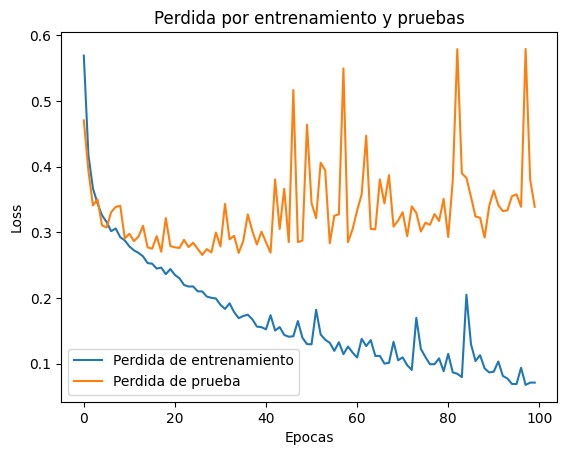

In [24]:
# Gráfico de la curva de pérdida
plt.figure()
plt.plot(train_losses, label='Perdida de entrenamiento')
plt.plot(test_losses, label='Perdida de prueba')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.title('Perdida por entrenamiento y pruebas')
plt.legend()
plt.show()

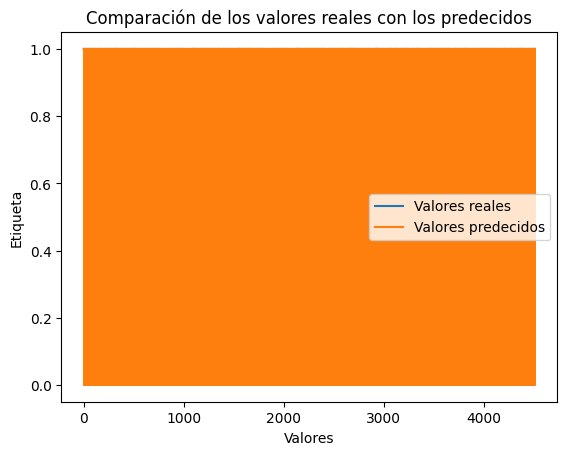

In [25]:
# Gráfico de la curva de pérdida
plt.figure()
plt.plot(y_true, label='Valores reales')
plt.plot(y_pred, label='Valores predecidos')
plt.xlabel('Valores')
plt.ylabel('Etiqueta')
plt.title('Comparación de los valores reales con los predecidos')
plt.legend()
plt.show()

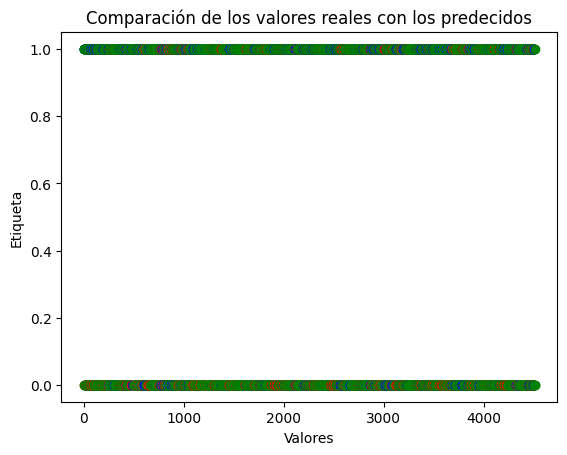

In [26]:
# Crear el gráfico de dispersión
plt.figure()

# Crear el gráfico de dispersión
for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
        plt.scatter(i, y_true[i], color='green', label='Iguales')
    else:
        plt.scatter(i, y_true[i], color='blue', label='Reales')
        plt.scatter(i, y_pred[i], color='red', label='Predecidos')

plt.xlabel('Valores')
plt.ylabel('Etiqueta')
plt.title('Comparación de los valores reales con los predecidos')
plt.show()

##**Calcular la matriz de confusión**

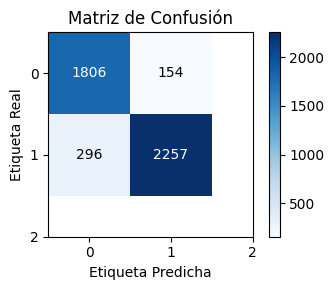

In [27]:
# Crear listas para las etiquetas reales y las predicciones
true_labels = []
predicted_labels = []

# Iterar sobre los datos de prueba
for inputs, labels in test_dataloader:
    # Obtener las predicciones del modelo
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.no_grad():
        valid_outputs = modelo(inputs)
        _, valid_predicted = torch.max(valid_outputs, 1)

    # Agregar las etiquetas reales y las predicciones a las listas
    true_labels += labels.tolist()
    predicted_labels += valid_predicted.tolist()

# Calcular la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

# Crear una lista de etiquetas de clase (dígitos)
classes = np.arange(3)

# Visualizar la matriz de confusión en un gráfico
plt.figure(figsize=(4, 3))
plt.imshow(cm, cmap='Blues')
plt.title('Matriz de Confusión')
plt.colorbar()

# Añadir etiquetas a los ejes x e y
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Añadir los valores de la matriz en cada celda
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.tight_layout()
plt.show()